In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**avg_technical_rating**: indicates expertise in technical skills like coding,design, marketing, finance, core subjects

**avg_skill_rating**: indicates general skills like communication, problem solving, time management, leadership etc

**avg_carrer_choice_rating**: avg rating of what matters the most for them from the carrer domain, expected pkg, work life balance, job security, learning opp etc


### Data Loading

In [2]:
df = pd.read_csv('df11.csv')
df.head()

,age,gender,state,city,studying_yr,department,course_outside_curriculum,cgpa,work_style,family_influence,higher_studies,career_counseling_exp,preferred_career_domains,avg_technical_rating,avg_skill_rating,avg_carrer_choice_rating
0,20,Male,Uttar Pradesh,Metro City,2,Mechanical,No,8.55,Mixed,No,Maybe,No,IT/Tech,2.4,3.3,4.1
1,19,Male,Maharashtra,Metro City,2,Mechanical,Yes,8.55,Mixed,No,No,No,Startups/Innovation,2.2,3.3,4.5
2,19,Male,Rajasthan,Tier 2 City,2,Metallurgy,No,7.80,Mixed,No,No,No,IT/Tech,2.2,3.0,3.8
3,20,Male,Uttar Pradesh,Metro City,2,Electrical,Yes,9.25,Mixed,No,No,Yes,IT/Tech,2.8,3.6,4.8
4,20,Male,Uttar Pradesh,Rural,2,Mechanical,Yes,8.55,Independent,No,No,No,IT/Tech,2.8,3.0,3.9


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        177 non-null    int64  
 1   gender                     177 non-null    object 
 2   state                      177 non-null    object 
 3   city                       177 non-null    object 
 4   studying_yr                177 non-null    int64  
 5   department                 177 non-null    object 
 6   course_outside_curriculum  177 non-null    object 
 7   cgpa                       177 non-null    float64
 8   work_style                 177 non-null    object 
 9   family_influence           177 non-null    object 
 10  higher_studies             177 non-null    object 
 11  career_counseling_exp      177 non-null    object 
 12  preferred_career_domains   177 non-null    object 
 13  avg_technical_rating       177 non-null    float64

In [4]:
df.describe()

,age,studying_yr,cgpa,avg_technical_rating,avg_skill_rating,avg_carrer_choice_rating
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,19.971751,2.288136,7.699153,2.175141,3.252542,4.130508
std,1.542686,1.028859,1.184218,0.776248,0.852474,0.622291
min,17.000000,1.000000,5.500000,1.000000,1.000000,1.100000
25%,19.000000,2.000000,6.750000,1.600000,2.700000,3.900000
50%,20.000000,2.000000,7.800000,2.000000,3.100000,4.100000
75%,21.000000,3.000000,8.550000,2.600000,3.900000,4.600000
max,30.000000,4.000000,10.000000,4.400000,5.000000,5.000000


In [5]:
# check for missing values
print(df.isnull().sum())

age                          0
gender                       0
state                        0
city                         0
studying_yr                  0
department                   0
course_outside_curriculum    0
cgpa                         0
work_style                   0
family_influence             0
higher_studies               0
career_counseling_exp        0
preferred_career_domains     0
avg_technical_rating         0
avg_skill_rating             0
avg_carrer_choice_rating     0
dtype: int64


#### histogram for numerical features

<Figure size 1200x600 with 0 Axes>

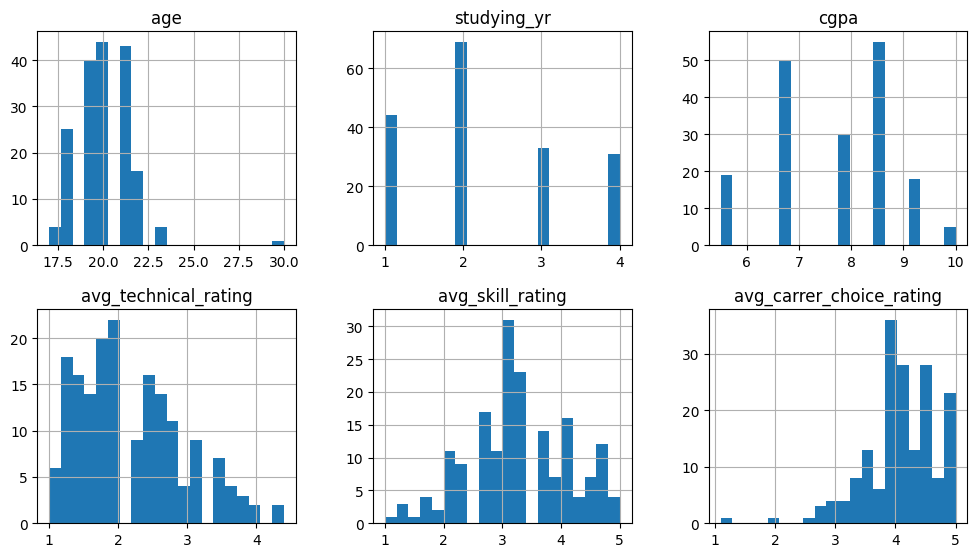

In [6]:
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10), layout=(3, 3))
plt.show()

#### countplot for categorical features

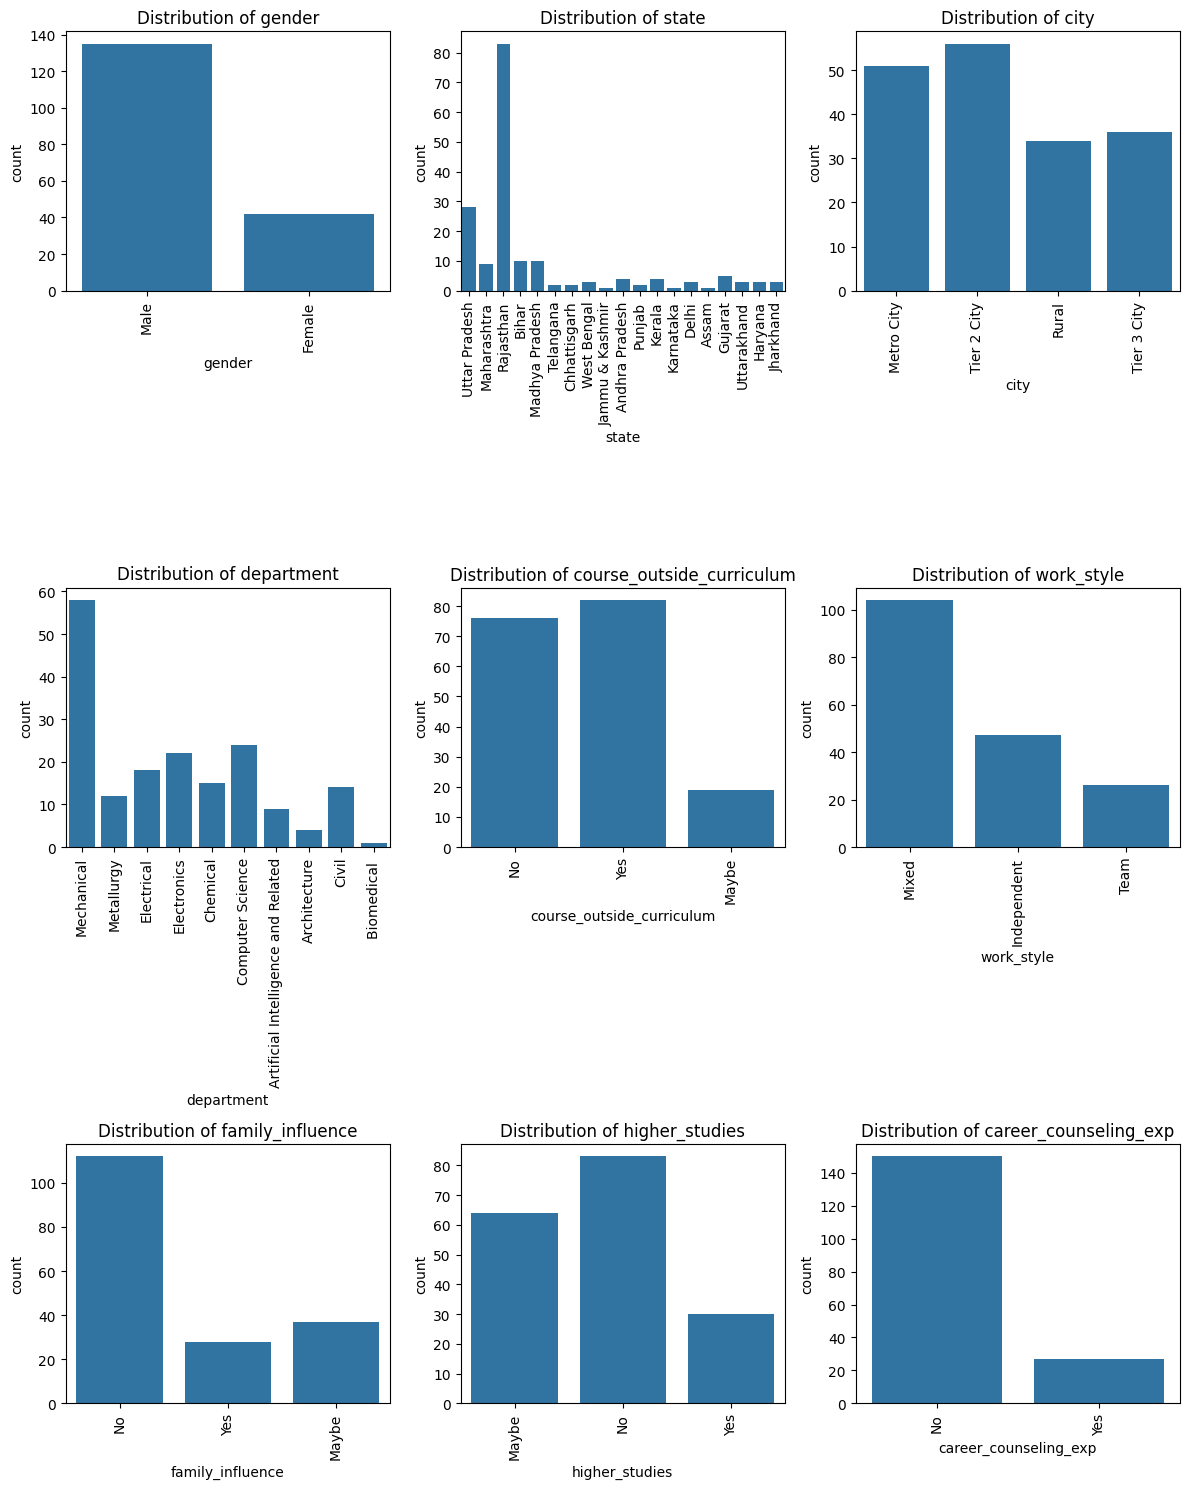

In [7]:
# categorical columns
categorical_cols = ['gender', 'state', 'city', 'department', 'course_outside_curriculum',
                    'work_style', 'family_influence', 'higher_studies', 'career_counseling_exp']
# for subplots
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,15))
# flatten for iteration
axes = axes.flatten()

#plot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

#### countplot for target columm 

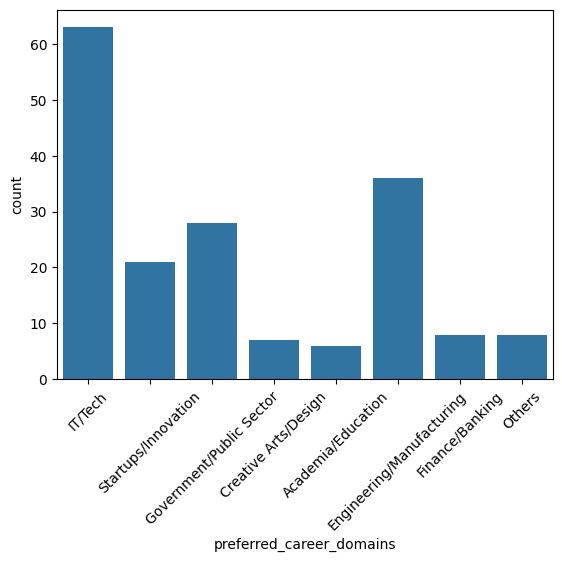

In [8]:
#-> 'preferred_career_domains'
sns.countplot(x=df['preferred_career_domains']).tick_params(axis='x', rotation=45)

#### boxplot for numerical columns

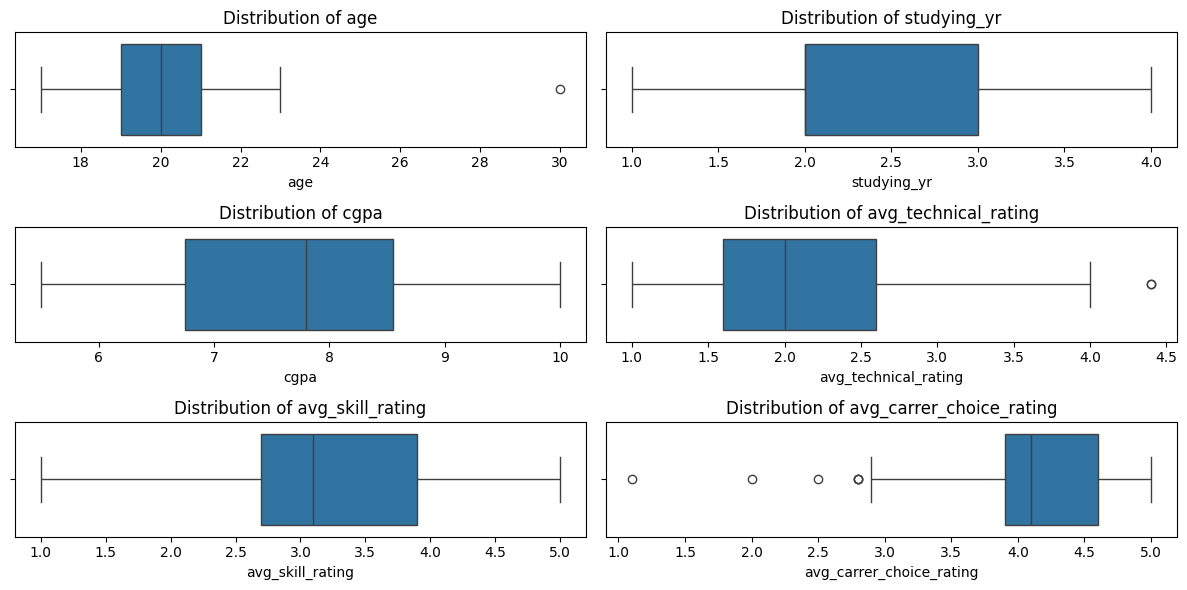

In [9]:
fig, axes = plt.subplots(3,2, figsize=(12,6))
axes = axes.flatten()

numerical_cols = ['age', 'studying_yr', 'cgpa', 'avg_technical_rating',
                      'avg_skill_rating', 'avg_carrer_choice_rating']
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x')
plt.tight_layout()
plt.show()

there are some outliers in the `avg_carrer_choice_rating` column

#### Correlation heatmap numerical columns

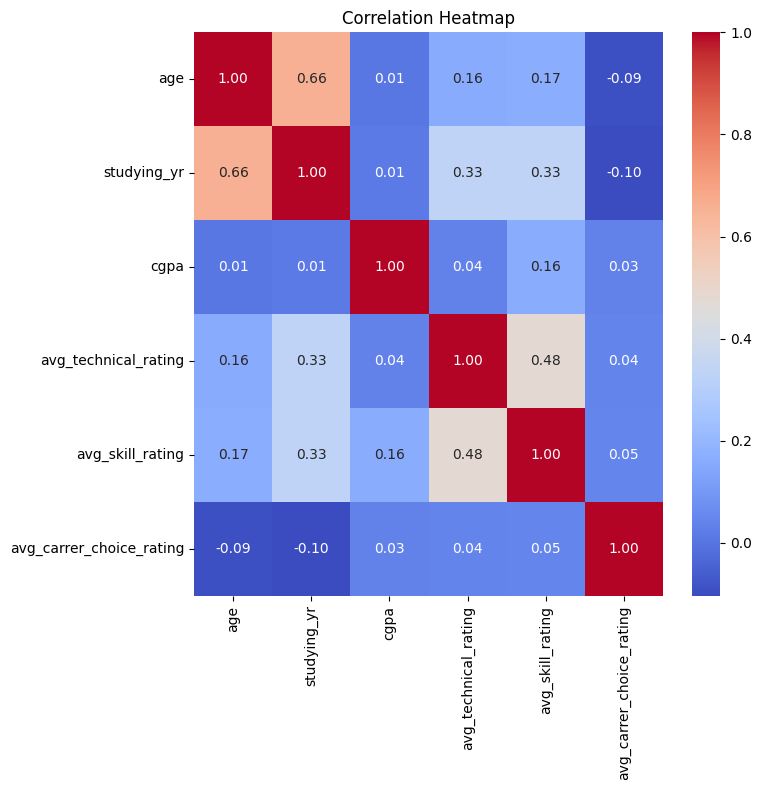

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

not ver much related but ya good enough

#### heatmap between catgorical columns and target column

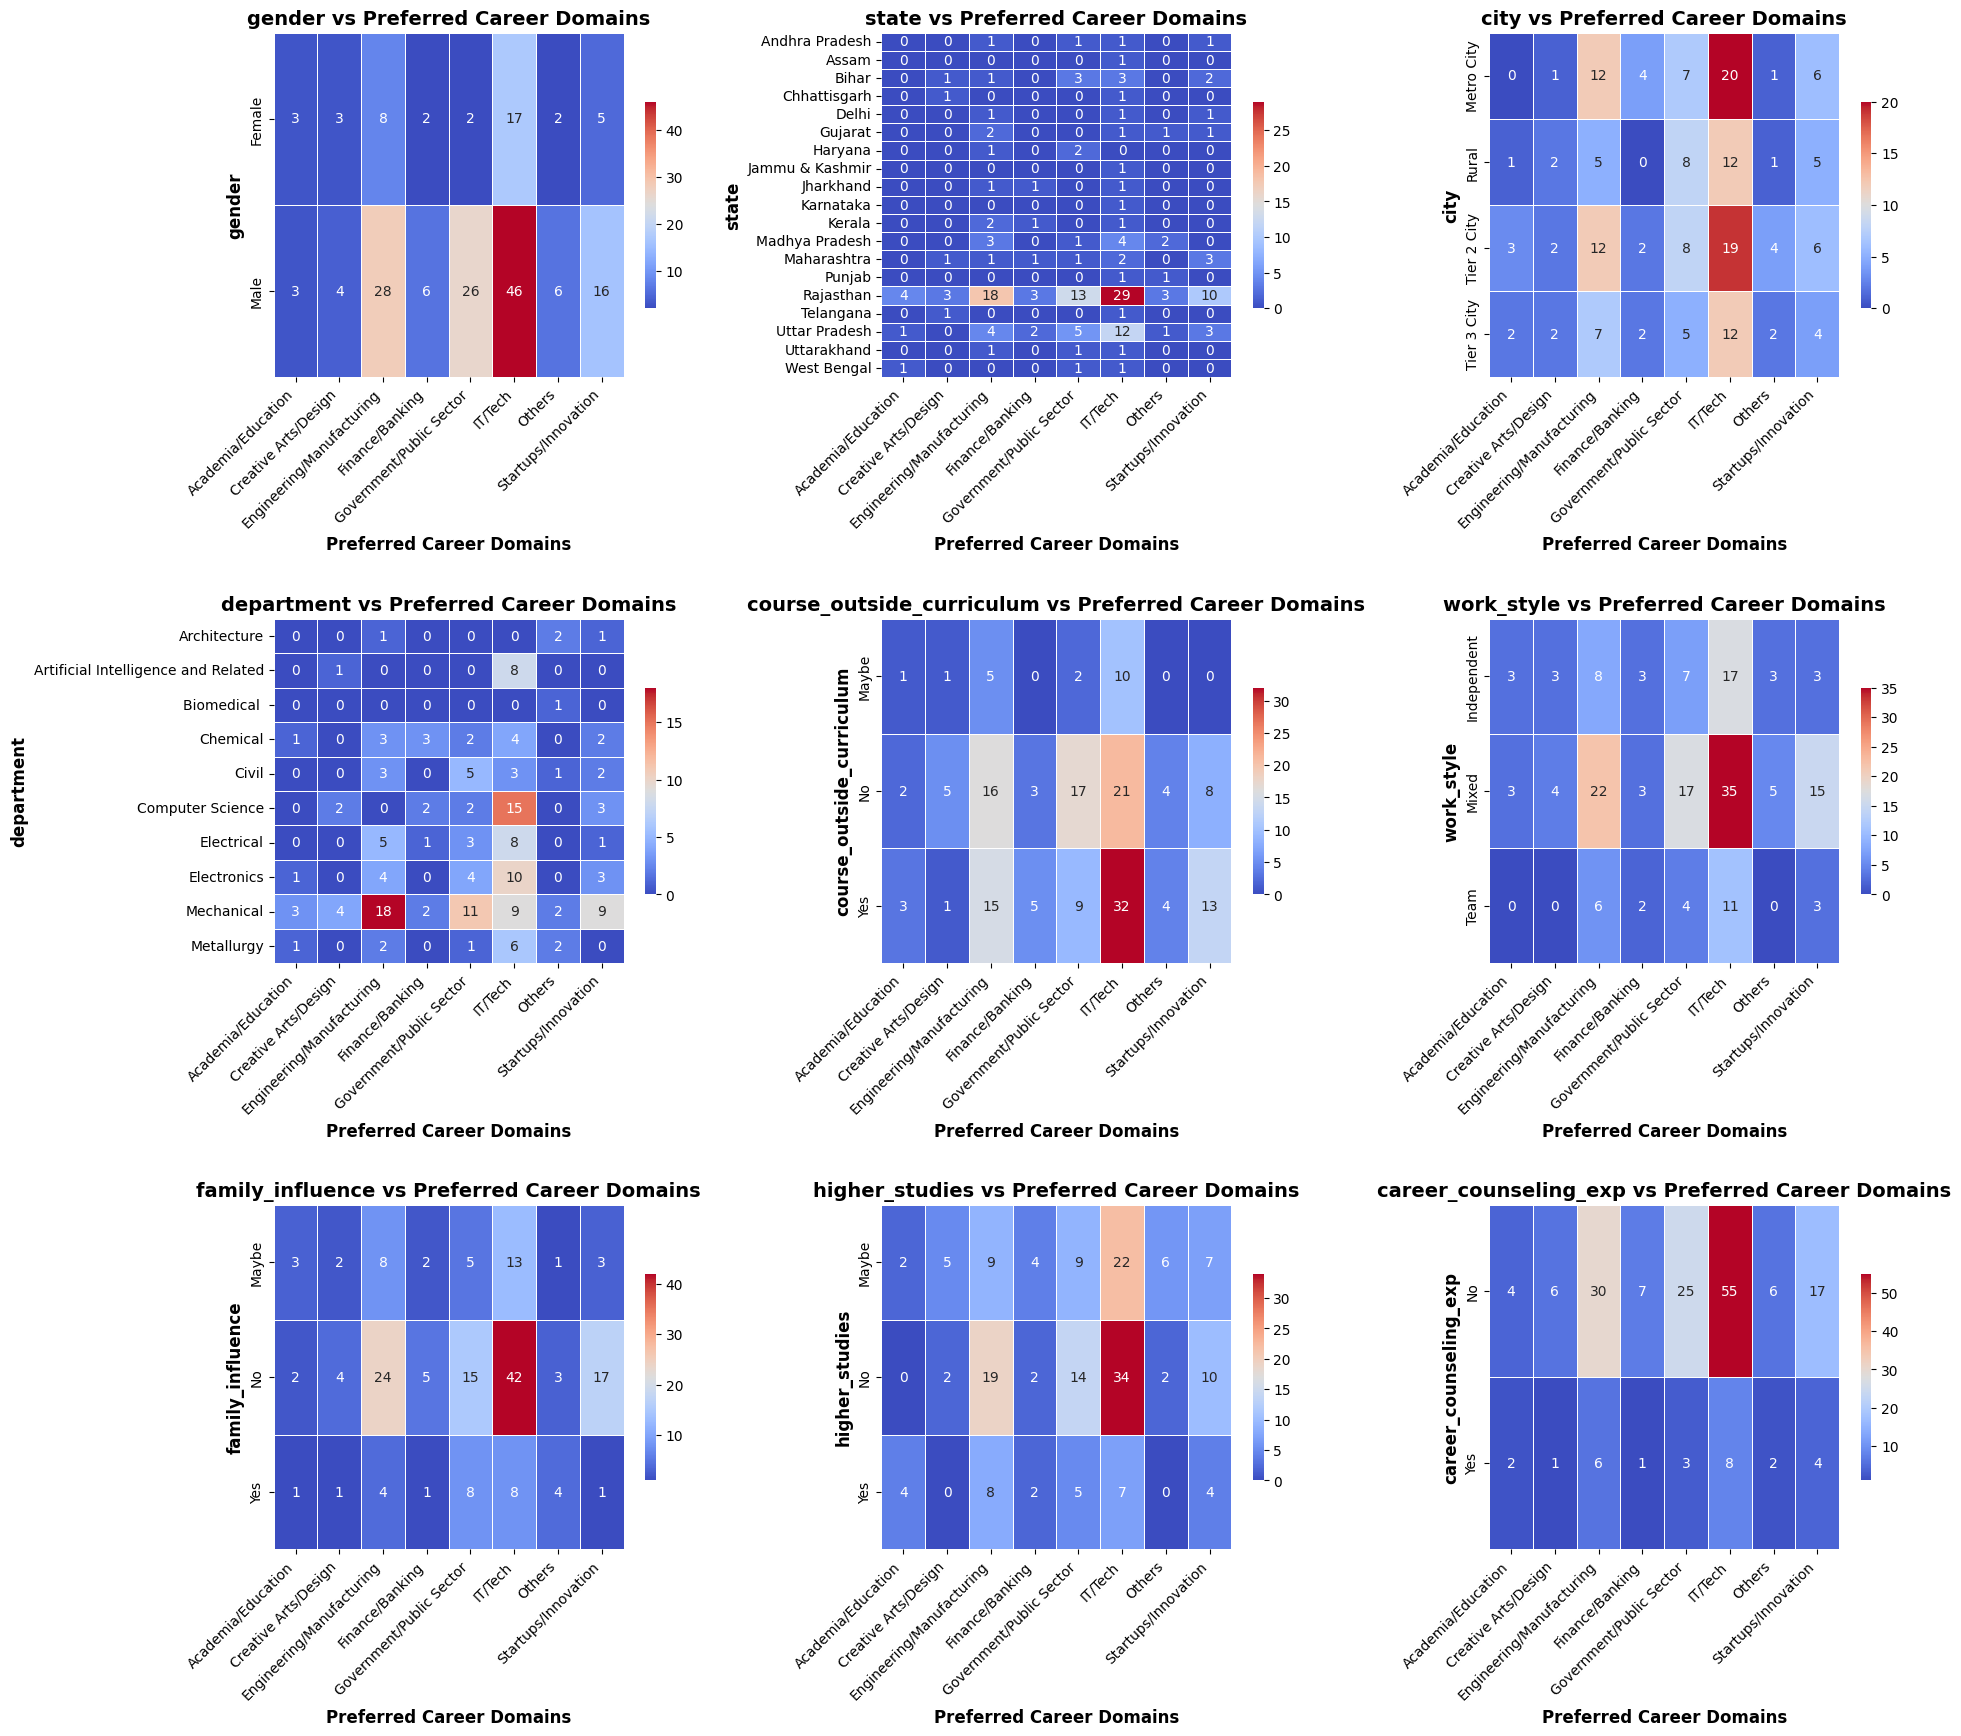

In [11]:
plt.figure(figsize=(20,18))

for i, col in enumerate(categorical_cols, 1):
    # subplots
    plt.subplot(3, 3, i)
    
    crosstab = pd.crosstab(df[col], df['preferred_career_domains'])
    
    sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5,
                cbar=True, cbar_kws={'shrink': 0.6}) # arguments to make plot nice

    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Preferred Career Domains", fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')
    plt.title(f"{col} vs Preferred Career Domains", fontsize=14, fontweight='bold')
plt.tight_layout(pad=3)
plt.show()

one thing for sure, the data is not completely well versed.

`work_style` column doesn't explain much, therefore can be dropped

#### Data Preprocessing

In [12]:
df['preferred_career_domains'].value_counts()

preferred_career_domains
IT/Tech                      63
Engineering/Manufacturing    36
Government/Public Sector     28
Startups/Innovation          21
Finance/Banking               8
Others                        8
Creative Arts/Design          7
Academia/Education            6
Name: count, dtype: int64

since it's a multi-class classification problem then there may be two ways to preprocess the target column
- label encoding: for tree based models
- one hot encoding: for ANN

#### for Tree based algos

In [13]:
# encode target variables -> label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['preferred_career_domains'] = le.fit_transform(df['preferred_career_domains'])
df['preferred_career_domains'].value_counts() 
# label encoder class assigns numbers after sorting the column's name alphabetically

preferred_career_domains
5    63
2    36
4    28
7    21
3     8
6     8
1     7
0     6
Name: count, dtype: int64

**Categorical Columns**

- One-Hot cols: `gender`, `state`, `department`, `work_style`
- Binary cols: `career_counseling_exp`
- Ordinal cols: `city`
- maybe cols: `course_outside_curriculum`,`higher_studies`,`family_influence`

In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

ohe = OneHotEncoder(sparse_output=False, drop="first")
# sparse: False -> returns numpy array
# drop = first -> to avoid dummy variable trap

oe = OrdinalEncoder(categories=[["Rural", "Tier 3 City", "Tier 2 City", "Metro City"],
                               ['No', 'Yes']])
# No < Maybe < Yes
# oe2 = OrdinalEncoder(categories=[["No", "Maybe", "Yes"]] * len(maybe_cols))

numeric_transf = Pipeline(steps =[
    ("num_scaler", StandardScaler()),
    ("pca", PCA(n_components=4))
])
# column transformer
ct = ColumnTransformer([
    ("num", numeric_transf, ['age', 'studying_yr', 'cgpa',
                                      'avg_technical_rating','avg_skill_rating', 
                                      'avg_carrer_choice_rating']),
    ("one_hot", ohe, ["gender", "state", "department",
                      "work_style", "course_outside_curriculum",
                       "higher_studies", "family_influence" ]),
    ("ord_enc", oe, ["city", "career_counseling_exp"]),
], remainder="passthrough")
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('num_scaler',
                                                  StandardScaler()),
                                                 ('pca', PCA(n_components=4))]),
                                 ['age', 'studying_yr', 'cgpa',
                                  'avg_technical_rating', 'avg_skill_rating',
                                  'avg_carrer_choice_rating']),
                                ('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'state', 'department', 'work_style',
                                  'course_outside_curriculum', 'higher_studies',
                                  'family_influence']),
                                ('ord_enc',
                                 OrdinalEncoder(categories=[['Rural',
                                                             'Tier 3 City',
                                                             'Tier 2 City',
                                                             'Metro City'],
                                                            ['No', 'Yes']]),
                                 ['city', 'career_counseling_exp'])])

#### Labels and Targets

In [62]:
X = df.drop(columns = ['preferred_career_domains'])
y = df['preferred_career_domains']

X.shape, y.shape

((177, 15), (177,))

#### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141, 15), (36, 15), (141,), (36,))

In [64]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [65]:
# convert numpy array to dataframe
pd.DataFrame(X_train, columns=ct.get_feature_names_out()).sample(5)

,num__pca0,num__pca1,num__pca2,num__pca3,one_hot__gender_Male,one_hot__state_Assam,one_hot__state_Bihar,one_hot__state_Chhattisgarh,one_hot__state_Delhi,one_hot__state_Gujarat,...,one_hot__work_style_Mixed,one_hot__work_style_Team,one_hot__course_outside_curriculum_No,one_hot__course_outside_curriculum_Yes,one_hot__higher_studies_No,one_hot__higher_studies_Yes,one_hot__family_influence_No,one_hot__family_influence_Yes,ord_enc__city,ord_enc__career_counseling_exp
33,1.941798,0.569383,0.402213,0.757982,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0
81,2.181890,0.538763,0.211698,0.279991,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
58,2.640476,-0.675195,0.858581,1.338572,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0
5,-0.091818,-1.191077,1.295712,0.551724,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
71,-1.378597,-0.137015,-0.466493,0.180836,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
import warnings
warnings.filterwarnings('ignore')

##### our model will performing poorly because there are very less examples for some classes
therfore generating synthetic data for minority classes using SMOTE

`SMOTE`: synthetic minority oversampling

In [67]:
from imblearn.over_sampling import SMOTE

#custom smote
smote = SMOTE(
    # sampling_strategy={0: 20, 1: 20, 3: 20, 6: 20},
    k_neighbors=2, 
    random_state=123)
X_res, y_res = smote.fit_resample(X_train, y_train)
X_res.shape

(424, 42)

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
lr = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=123
)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 3 0 2 3 0 2]
 [0 0 0 0 0 3 0 0]
 [0 0 2 0 0 4 0 1]
 [0 0 1 0 1 8 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.50      0.30      0.38        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.36      0.80      0.50        10
           6       0.00      0.00      0.00         1
           7       0.20      0.50      0.29         2

    accuracy                           0.33        36
   macro avg       0.13      0.20      0.15        36
weighted avg       0.25      0.33      0.26        36


Accuracy:  0.3333333333333333


##### Logistic regression after smote

In [69]:
lr.fit(X_res, y_res)
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 1 2 4 1 0 1]
 [0 0 0 0 0 3 0 0]
 [0 2 1 1 0 2 1 0]
 [0 0 0 0 2 5 1 2]
 [0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.33      0.10      0.15        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.38      0.50      0.43        10
           6       0.00      0.00      0.00         1
           7       0.20      0.50      0.29         2

    accuracy                           0.19        36
   macro avg       0.11      0.14      0.11        36
weighted avg       0.21      0.19      0.18        36


Accuracy:  0.19444444444444445


### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(
    class_weight='balanced', # balanced to pay attention to minority classes
    random_state=123)
dtree.fit(X_train, y_train)

dt_y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, dt_y_pred)
acc = accuracy_score(y_test, dt_y_pred)
cr = classification_report(y_test, dt_y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 0 3 0 3]
 [0 0 1 1 0 0 0 1]
 [0 2 1 1 1 0 0 2]
 [0 0 1 0 0 6 0 3]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.17      0.10      0.12        10
           3       0.33      0.33      0.33         3
           4       1.00      0.14      0.25         7
           5       0.55      0.60      0.57        10
           6       0.00      0.00      0.00         1
           7       0.09      0.50      0.15         2

    accuracy                           0.28        36
   macro avg       0.27      0.21      0.18        36
weighted avg       0.43      0.28      0.28        36


Accuracy:  0.2777777777777778


the reason of accuracy to such low -> imbalanced dataset (decision tree are sensitive to imbalance dataset

##### applying decision tree after smote

In [71]:
dtree.fit(X_res, y_res)

y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 2 5 1 1]
 [0 0 0 0 1 0 1 1]
 [0 0 1 1 0 4 1 0]
 [0 0 0 1 2 5 1 1]
 [0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.31      0.50      0.38        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.14        36
   macro avg       0.04      0.06      0.05        36
weighted avg       0.09      0.14      0.11        36


Accuracy:  0.1388888888888889


##### Hyperparameter Tuning using GridSearchCV with StratifiedKFold for best params

In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'max_depth': [3,5,7,10,15],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'criterion': ['entropy'],
    'class_weight': ['balanced'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid,
                    cv=cv,
                    n_jobs=1
                   )
grid.fit(X_train, y_train)
print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Score: 0.2911330049261084
Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


###### Training using the best params

In [26]:
best_params = grid.best_params_
dtree_ht = DecisionTreeClassifier(**best_params, random_state=1234)
dtree_ht.fit(X_train, y_train)

y_pred = dtree_ht.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 0 2 4 1 2 0 1]
 [0 0 0 0 0 2 0 1]
 [0 0 3 1 0 3 0 0]
 [0 0 2 1 1 2 2 2]
 [0 0 1 0 0 0 0 0]
 [0 0 1 0 0 1 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.22      0.20      0.21        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.20      0.20      0.20        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.11        36
   macro avg       0.05      0.05      0.05        36
weighted avg       0.12      0.11      0.11        36


Accuracy:  0.1111111111111111


### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    class_weight='balanced', # to adjust class imbalance
    random_state = 123)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_y_pred)
acc = accuracy_score(y_test, rf_y_pred)
cr = classification_report(y_test, rf_y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 0 0 0 2 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 2 0 1 6 0 1]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 6 0 1]
 [0 0 0 0 1 9 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.67      0.20      0.31        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.31      0.90      0.46        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.31        36
   macro avg       0.12      0.14      0.10        36
weighted avg       0.27      0.31      0.21        36


Accuracy:  0.3055555555555556


##### applying random forest after smote

In [74]:
rf.fit(X_res, y_res)
rf_y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_y_pred)
acc = accuracy_score(y_test, rf_y_pred)
cr = classification_report(y_test, rf_y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 0 0 0 2 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 4 0 0 4 0 2]
 [0 0 0 0 0 2 0 1]
 [0 0 1 0 0 5 0 1]
 [0 0 0 0 3 6 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.67      0.40      0.50        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.27      0.60      0.38        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.28        36
   macro avg       0.12      0.12      0.11        36
weighted avg       0.26      0.28      0.24        36


Accuracy:  0.2777777777777778


### XGBoost for Multi-Class

In [75]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 123, learning_rate=0.001, n_estimators=300)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_test, xgb_y_pred)
acc = accuracy_score(y_test, xgb_y_pred)
cr = classification_report(y_test, xgb_y_pred)

print('Confusion Matrix: ', cm)
print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)

Confusion Matrix:  [[0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 3 0 1 5 0 1]
 [0 0 0 0 0 3 0 0]
 [0 1 2 0 0 2 0 2]
 [0 1 0 0 1 6 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.43      0.30      0.35        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.32      0.60      0.41        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.25        36
   macro avg       0.09      0.11      0.10        36
weighted avg       0.21      0.25      0.21        36


Accuracy:  0.25


##### applying xgboost after smote

In [76]:
xgb.fit(X_res, y_res)
xgb_y_pred = xgb.predict(X_test)

cm = confusion_matrix(y_test, xgb_y_pred)
acc = accuracy_score(y_test, xgb_y_pred)
cr = classification_report(y_test, xgb_y_pred)

print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.40      0.20      0.27        10
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         7
           5       0.43      0.60      0.50        10
           6       0.25      1.00      0.40         1
           7       0.00      0.00      0.00         2

    accuracy                           0.28        36
   macro avg       0.20      0.27      0.20        36
weighted avg       0.28      0.28      0.26        36


Accuracy:  0.2777777777777778


### MLPClassifier (Multi Layer Perceptron)

In [77]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64,32), # 2 hidden layers with 64 and 32 neurons
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=1000,
    # early_stopping=True,
    random_state=123
)
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, mlp_y_pred)
cr = classification_report(y_test, mlp_y_pred)

print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.38      0.30      0.33        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.38      0.80      0.52        10
           6       0.00      0.00      0.00         1
           7       0.17      0.50      0.25         2

    accuracy                           0.33        36
   macro avg       0.12      0.20      0.14        36
weighted avg       0.22      0.33      0.25        36


Accuracy:  0.3333333333333333


In [80]:
# smote
mlp.fit(X_res, y_res)
mlp_y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, mlp_y_pred)
cr = classification_report(y_test, mlp_y_pred)

print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.33      0.30      0.32        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.36      0.50      0.42        10
           6       0.00      0.00      0.00         1
           7       0.14      0.50      0.22         2

    accuracy                           0.25        36
   macro avg       0.10      0.16      0.12        36
weighted avg       0.20      0.25      0.22        36


Accuracy:  0.25


#### Ensemble with logistic regression, random forest, xgboost

In [81]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(random_state=123)
rf_clf = RandomForestClassifier(random_state=123)
xgb_clf = XGBClassifier()

#ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', log_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # soft voting for probabilistic averaging
)
voting_clf

VotingClassifier(estimators=[('logreg', LogisticRegression(random_state=123)),
                             ('rf', RandomForestClassifier(random_state=123)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_type...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [82]:
voting_clf.fit(X_res, y_res)
y_pred = voting_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('\nClassification Report:\n', cr)
print('\nAccuracy: ', acc)
print("F1 Macro:", f1_score(y_test, y_pred, average='macro'))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.50      0.40      0.44        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.29      0.50      0.37        10
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.25        36
   macro avg       0.10      0.11      0.10        36
weighted avg       0.22      0.25      0.23        36


Accuracy:  0.25
F1 Macro: 0.10185185185185185


### ANN

In [83]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [84]:
import torch
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(123)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)

In [85]:
X_train.dtype, y_train.dtype

(torch.float32, torch.int64)

In [86]:
X_test.dtype, y_test.dtype

(torch.float32, torch.int64)

In [87]:
# Train Dataset and Dataloader

# dataset
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

# dataloader
torch.manual_seed(123)
batch_size = 2
train_loader = DataLoader(dataset= train_ds, batch_size = batch_size, shuffle= True)
test_loader = DataLoader(dataset= test_ds, batch_size = batch_size)

In [88]:
for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([2, 42]) torch.Size([2])


#### Our NN model
`input_size` = 44 (num of features)

`n_hidden_layers` = 2

`hidden_size` = 64

`output_size` = 8 (classes in target column) 

In [89]:
import torch.nn as nn

class NNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return x

In [90]:
input_size = X_train.shape[-1]
hidden_size = 64
output_size = 8

# create model instance
model = NNModel(input_size, hidden_size, output_size)

In [91]:
model

NNModel(
  (layer1): Linear(in_features=42, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=42, bias=True)
)

In [95]:
# learning rate, optimizer, loss fn
lr = 0.0003
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)

In [96]:
n_epochs = 100
torch.manual_seed(123)


for epoch in range(n_epochs):
    print(f'Epoch {epoch} -->\n')

    # training
    train_loss = 0
    train_acc = 0
    for X_batch, y_batch in train_loader:
        model.train()
        #forward pass
        y_pred = model(X_batch)
        # loss per batch
        loss = loss_fn(y_pred, y_batch)
        # loss
        train_loss +=loss
        #accuracy
        correct = (torch.argmax(y_pred, dim=1) == y_batch).float()
        train_acc += correct.mean()
        
        #optimizer zero grad
        optimizer.zero_grad()
        #loss backward (backprop)
        loss.backward()
        # optimizer step (grad descent)
        optimizer.step()
    # average loss per batch
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    # testing
    model.eval() # put model to evaluation mode
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for X, y in test_loader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            correct = (torch.argmax(test_pred, dim=1) == y).float()
            test_acc += correct.mean()
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

    print(f'Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.3f}')
    print(f'Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.3f}')

Epoch 0 -->

Train Loss: 1.624 | Train Accuracy: 0.387
Test Loss: 1.876 | Test Accuracy: 0.278
Epoch 1 -->

Train Loss: 1.618 | Train Accuracy: 0.380
Test Loss: 1.885 | Test Accuracy: 0.278
Epoch 2 -->

Train Loss: 1.624 | Train Accuracy: 0.373
Test Loss: 1.876 | Test Accuracy: 0.278
Epoch 3 -->

Train Loss: 1.609 | Train Accuracy: 0.380
Test Loss: 1.877 | Test Accuracy: 0.278
Epoch 4 -->

Train Loss: 1.605 | Train Accuracy: 0.380
Test Loss: 1.888 | Test Accuracy: 0.278
Epoch 5 -->

Train Loss: 1.604 | Train Accuracy: 0.373
Test Loss: 1.883 | Test Accuracy: 0.278
Epoch 6 -->

Train Loss: 1.595 | Train Accuracy: 0.380
Test Loss: 1.877 | Test Accuracy: 0.278
Epoch 7 -->

Train Loss: 1.593 | Train Accuracy: 0.380
Test Loss: 1.884 | Test Accuracy: 0.278
Epoch 8 -->

Train Loss: 1.589 | Train Accuracy: 0.380
Test Loss: 1.885 | Test Accuracy: 0.250
Epoch 9 -->

Train Loss: 1.591 | Train Accuracy: 0.373
Test Loss: 1.882 | Test Accuracy: 0.250
Epoch 10 -->

Train Loss: 1.582 | Train Accuracy: 

clearly our model is overfitting on training data

### INFERENCE

In [45]:
# df.head()

In [97]:
df1 = df.drop(columns = ['preferred_career_domains'])
cols = df1.columns
cols

Index(['age', 'gender', 'state', 'city', 'studying_yr', 'department',
       'course_outside_curriculum', 'cgpa', 'work_style', 'family_influence',
       'higher_studies', 'career_counseling_exp', 'avg_technical_rating',
       'avg_skill_rating', 'avg_carrer_choice_rating'],
      dtype='object')

In [112]:
import numpy as np
arr = np.array([[20, 'Female', 'Uttar Pradesh', 'Tier 2 City', 2, 'Civil', 
                 'Yes', 6.5, 'Independent', 'Yes',
                 'No','No',2.0,2,3]])
test_df = pd.DataFrame(arr, columns = cols)
test_df

,age,gender,state,city,studying_yr,department,course_outside_curriculum,cgpa,work_style,family_influence,higher_studies,career_counseling_exp,avg_technical_rating,avg_skill_rating,avg_carrer_choice_rating
0,20,Female,Uttar Pradesh,Tier 2 City,2,Civil,Yes,6.5,Independent,Yes,No,No,2.0,2,3


In [113]:
test_X = ct.transform(test_df)

In [114]:
test_X

array([[-1.08402408,  1.63286313, -1.35782338, -0.1585895 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         2.        ,  0.        ]])

In [115]:
test_X = test_X.astype(float)
print(test_X.dtype)

float64


In [116]:
# convert it to tensor
X = torch.from_numpy(test_X).float()
X

tensor([[-1.0840,  1.6329, -1.3578, -0.1586,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,
          2.0000,  0.0000]])

In [117]:
# model to eval mode
model.eval()
y = model(X)
y # logits

tensor([[ -0.9078,  -0.6608,   1.4655,  -0.2740,   1.0786,   1.8919,   0.7312,
          -0.3298, -15.6517, -16.0571, -15.8910, -14.9790, -15.7277, -14.9291,
         -15.5927, -15.7487, -16.1967, -15.7089, -15.7356, -15.4166, -15.8891,
         -15.9911, -15.1102, -15.8331, -15.6437, -15.0809, -15.1472, -15.8368,
         -15.9035, -15.2001, -14.8897, -15.5740, -15.6496, -15.4447, -15.6061,
         -15.7459, -14.7119, -15.4344, -15.5042, -15.2669, -15.7933, -15.3886]],
       grad_fn=<AddmmBackward0>)

In [118]:
# convert logits to actual values
result = torch.argmax(y, dim=1)
result

tensor([5])

**5 corresponds IT/Tech**